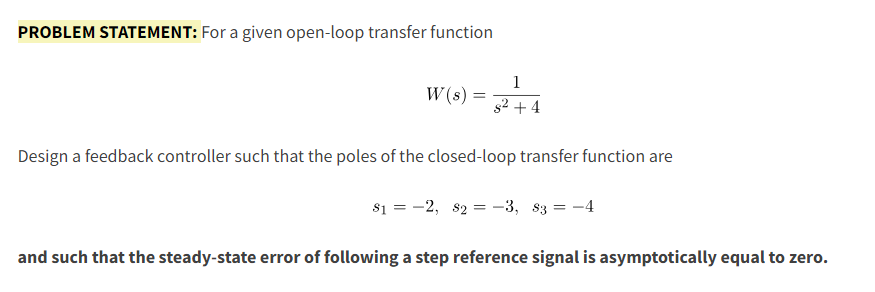

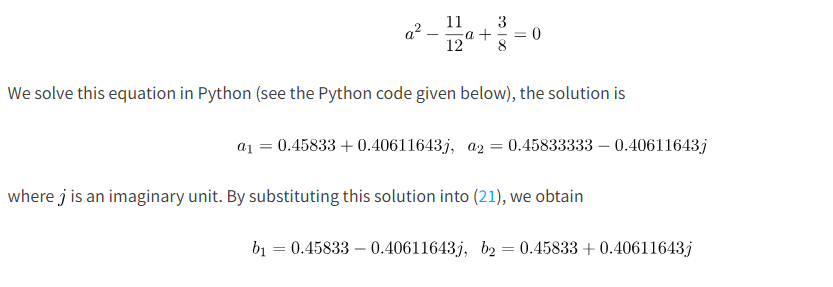

In [4]:
# -*- coding: utf-8 -*-
"""
Solution of nonlinear pole placement equation in Python
"""

import numpy as np

# coefficients of the equation for a
coeff = [1, -11/12, 3/8]

aCoeff = np.roots(coeff)
bCoeff = [(3/8)/(aCoeff[0]), (3/8)/(aCoeff[1])]

# double check the result
# a*b= 3/8=0.375
aCoeff[0]*bCoeff[0]
aCoeff[1]*bCoeff[1]
 
# a+b=11/12=0.9166666666666666
aCoeff[0]+bCoeff[0]
aCoeff[1]+bCoeff[1]

# this is the third coefficient of the controller
K=24

# Coefficients of the controller, first set of coefficients
# (k11*s^{2}+k21*s+k31)/s
k11=np.real(K*(aCoeff[0]*bCoeff[0]))
k21=np.real(K*(aCoeff[0]+bCoeff[0]))
k31=K
print(k11)
print(k21)
print(k31)

# Cofficients of the controller, first set of coefficients
# (k12*s^{2}+k22*s+k32)/s
k12=np.real(K*(aCoeff[1]*bCoeff[1]))
k22=np.real(K*(aCoeff[1]+bCoeff[1]))
k32=K
print(k12)
print(k22)
print(k32)

# double check the final characteristic polynomial 
# c1*s^{3}+c2*s^{2}+c3*s+c4
c1=1
c2=np.real(K*aCoeff[0]*bCoeff[0])
c3=4+K*aCoeff[0]+K*bCoeff[0]
c4=K
 
polyFinal=[c1,c2,c3,c4]
print("Final characteristic polynomial coefficients:")
print(polyFinal)
np.roots(polyFinal)

9.0
22.0
24
9.0
22.0
24
Final characteristic polynomial coefficients:
[1, np.float64(9.0), np.complex128(26-1.7763568394002505e-15j), 24]


array([-4.-3.12250226e-15j, -3.+6.14545914e-15j, -2.-2.30854377e-15j])

3 states have been removed from the model
<TransferFunction>: sys[39]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     9 s^2 + 22 s + 24
  -----------------------
  s^3 + 9 s^2 + 26 s + 24
Closed loop poles:
[-4.+0.j -3.+0.j -2.+0.j]
Closed loop zeros:
[-1.22222222+1.08297715j -1.22222222-1.08297715j]


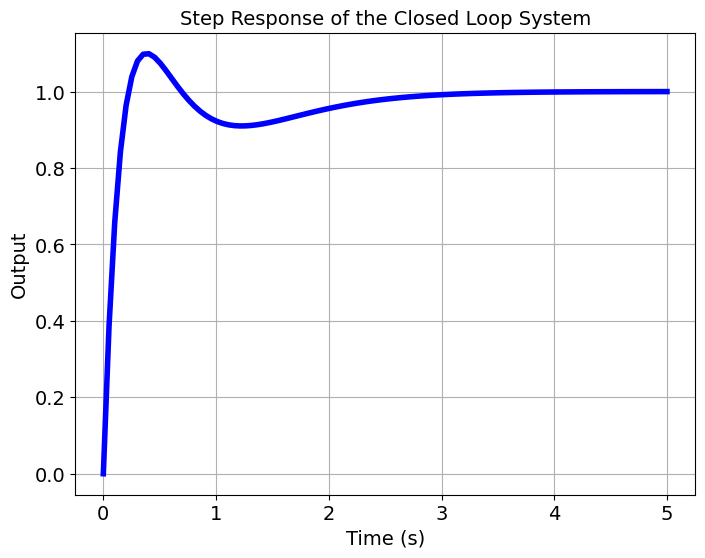

<TransferFunction>: sys[56]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            24
  -----------------------
  s^3 + 9 s^2 + 26 s + 24
Closed loop poles without zeros:
[-4.+0.j -3.+0.j -2.+0.j]
Closed loop zeros without zeros:
[]


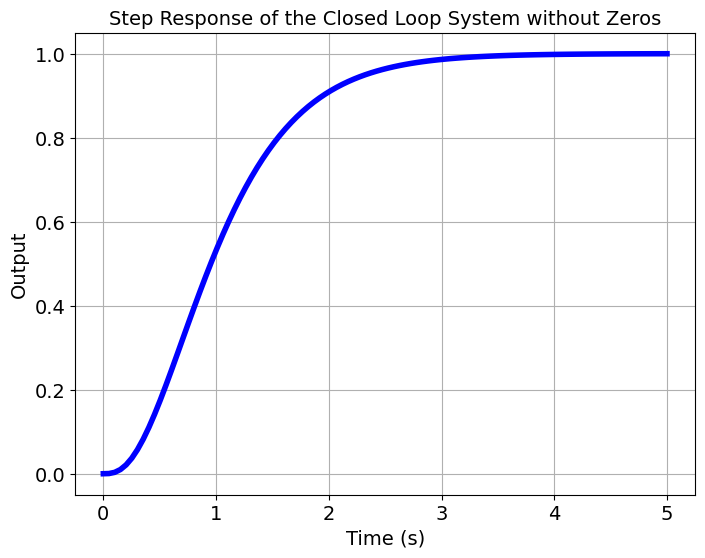

In [6]:
#The Python code used to simulate the closed loop system

import matplotlib.pyplot as plt
import control as ct
import numpy as np

# this function is used for plotting of responses 
# it generates a plot and saves the plot in a file 
 
# xAxisVector - time vector
# yAxisVector - response vector
# titleString - title of the plot
# stringXaxis - x axis label 
# stringYaxis - y axis label
# stringFileName - file name for saving the plot, usually png or pdf files

def plottingFunction(xAxisVector,yAxisVector,titleString,stringXaxis,stringYaxis,stringFileName):
    plt.figure(figsize=(8,6))
    plt.plot(xAxisVector,yAxisVector, color='blue',linewidth=4)
    plt.title(titleString, fontsize=14)
    plt.xlabel(stringXaxis, fontsize=14)
    plt.ylabel(stringYaxis,fontsize=14)
    plt.tick_params(axis='both',which='major',labelsize=14)
    plt.grid(visible=True)
    plt.savefig(stringFileName,dpi=600)
    plt.show()


# Plant transfer function
s = ct.TransferFunction.s
W = 1/(s**2 + 4)
# Controller transfer function
C = (24/s)+22+9*s
# Closed loop transfer function

Wc1 = W*C/(1+W*C)
Wc1 = ct.minreal(Wc1)

print(Wc1)  
print("Closed loop poles:")
print(ct.poles(Wc1))
print("Closed loop zeros:")
print(ct.zeros(Wc1))

#simulation of step response
timeVector = np.linspace(0, 5, 100)
timeReturned , systemOutput = ct.step_response(Wc1, timeVector)

# plotting of step response
plottingFunction(timeReturned,systemOutput,titleString='Step Response of the Closed Loop System',stringXaxis='Time (s)',stringYaxis='Output',stringFileName='StepResponseClosedLoopSystem.png')

# now without zeros
 
Wcl2= 24*Wc1*1/( 9*s**2 + 22*s + 24)
Wcl2=Wcl2.minreal()
print(Wcl2)

print("Closed loop poles without zeros:")
print(ct.poles(Wcl2))
print("Closed loop zeros without zeros:")
print(ct.zeros(Wcl2))

#simulation of step response
timeReturned2 , systemOutput2 = ct.step_response(Wcl2, timeVector)

# plotting of step response
plottingFunction(timeReturned2,systemOutput2,titleString='Step Response of the Closed Loop System without Zeros',stringXaxis='Time (s)',stringYaxis='Output',stringFileName='StepResponseClosedLoopSystemWithoutZeros.png')